<a href="https://colab.research.google.com/github/Praful-John2409/Feature-Engineering-Unstructured-Data-Audio-Wave-Files-/blob/main/Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install librosa matplotlib
import librosa
import matplotlib.pyplot as plt
import numpy as np
import librosa.display

In [2]:
from google.colab import files
files.upload()

Saving 4 Parker Solar Probe - Whistler Mode Waves 2.mp3 to 4 Parker Solar Probe - Whistler Mode Waves 2.mp3
Saving 5 jno-E45-LFRH-22-272-0836-1006-fnl.wav to 5 jno-E45-LFRH-22-272-0836-1006-fnl.wav
Saving 3 whistler.mp3 to 3 whistler.mp3
Saving 2 578359main_kepler_star_KIC7671081B.mp3 to 2 578359main_kepler_star_KIC7671081B.mp3
Saving 1 578358main_kepler_star_KIC12268220C.mp3 to 1 578358main_kepler_star_KIC12268220C.mp3


{'4 Parker Solar Probe - Whistler Mode Waves 2.mp3': b'\xff\xfb\x90D\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00Info\x00\x00\x00\x0f\x00\x00\x02\x19\x00\x03n]\x00\x02\x05\x08\n\r\x10\x12\x14\x17\x19\x1c\x1f!$\'(+.0368;=@BEHJMPQTWY\\_adfhknpsvxz}\x80\x82\x85\x88\x8a\x8d\x8f\x91\x94\x97\x99\x9c\x9f\xa1\xa3\xa6\xa8\xab\xae\xb0\xb3\xb6\xb8\xba\xbd\xc0\xc2\xc5\xc8\xca\xcc\xcf\xd1\xd4\xd7\xd9\xdc\xdf\xe1\xe3\xe6\xe8\xeb\xee\xf0\xf3\xf5\xf7\xfa\xfd\x00\x00\x009LAME3.100\x01\xaa\x00\x00\x00\x00.,\x00\x00\x14\x80$\x02\x88N\x00\x00\x80\x00\x03n]\x8f\xdfp\xe6\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x

In [23]:
# Function to compute display spectogram
def display_spectrogram(y, sr, title):
    plt.figure(figsize=(10, 4))
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Spectrogram - {title}')
    plt.tight_layout()
    plt.show()

# Function to compute mel-scaled spectrogram
def mel_spectrogram(y, sr, title):
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    S_dB = librosa.power_to_db(S, ref=np.max)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Mel-scaled spectrogram - {title}')
    plt.tight_layout()
    plt.show()

# Function to display chromagram
def chromagram(y, sr, title):
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(chroma, sr=sr, x_axis='time', y_axis='chroma')
    plt.colorbar()
    plt.title(f'Chromagram - {title}')
    plt.tight_layout()
    plt.show()

# Function to perform Constant-Q Transform (CQT)
def constant_q_transform(y, sr, title):
    CQT = librosa.cqt(y, sr=sr)
    CQT_dB = librosa.amplitude_to_db(np.abs(CQT), ref=np.max)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(CQT_dB, sr=sr, x_axis='time', y_axis='cqt_note')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Constant-Q Transform - {title}')
    plt.tight_layout()
    plt.show()

# Function for beat tracking
def beat_tracking(y, sr, title):
    tempo, beats = librosa.beat.beat_track(y=y, sr=sr)
    print(f'{title} - Tempo: {tempo} BPM')
    plt.figure(figsize=(10, 4))
    times = librosa.times_like(beats, sr=sr)
    plt.plot(times, beats, label='Beats')
    plt.title(f'Beat Tracking - {title}')
    plt.tight_layout()
    plt.show()
# Function for mfccs
def mfccs(y, sr, title):
    mfccs = librosa.feature.mfcc(y=y, sr=sr)
    print(mfccs.shape)
    plt.figure(figsize=(15, 10))
    librosa.display.specshow(mfccs, sr=sr, x_axis='time')
    plt.colorbar()
    plt.title(f'MFCCs - {title}')

In [10]:
#adding the audio files
audio_files = {
    '/content/1_578358main_kepler_star_KIC12268220C.mp3': 'Kepler: Star KIC12268220C',
    '/content/2_578359main_kepler_star_KIC7671081B.mp3': 'Kepler: Star KIC7671081B',
    '/content/3_whistler.mp3': 'Whistler Waves',
    '/content/4_Parker Solar Probe - Whistler Mode Waves 2.mp3': 'Parker Solar Probe: Whistler Mode Waves 2',
    '/content/5_jno-E45-LFRH-22-272-0836-1006-fnl.wav': 'Juno Mission: Europa Flyby'
}

# Loop through each audio file and extract features
for file_path, title in audio_files.items():
    print(f"Processing: {title}")
    y, sr = librosa.load(file_path)
    print(f"Sample rate: {sr}")
    print(f"Duration: {librosa.get_duration(y=y, sr=sr)} seconds")

Processing: Kepler: Star KIC12268220C
Sample rate: 22050
Duration: 7.032018140589569 seconds
Processing: Kepler: Star KIC7671081B
Sample rate: 22050
Duration: 20.59201814058957 seconds
Processing: Whistler Waves
Sample rate: 22050
Duration: 30.88417233560091 seconds
Processing: Parker Solar Probe: Whistler Mode Waves 2
Sample rate: 22050
Duration: 14.0 seconds
Processing: Juno Mission: Europa Flyby
Sample rate: 22050
Duration: 11.82984126984127 seconds


# Displaying each feature for the every audio file

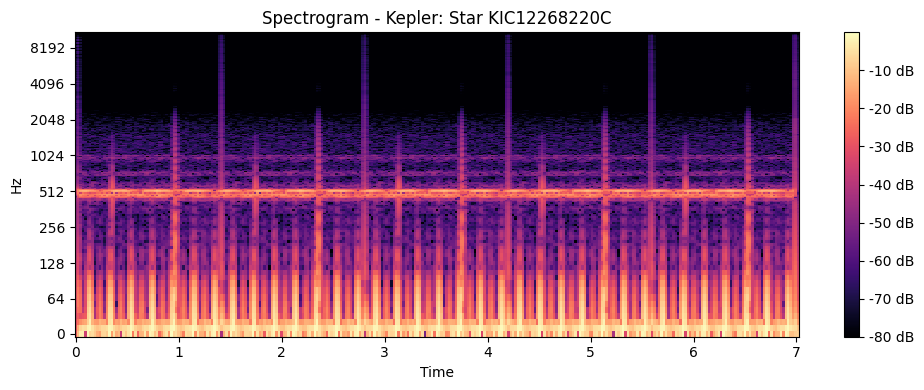

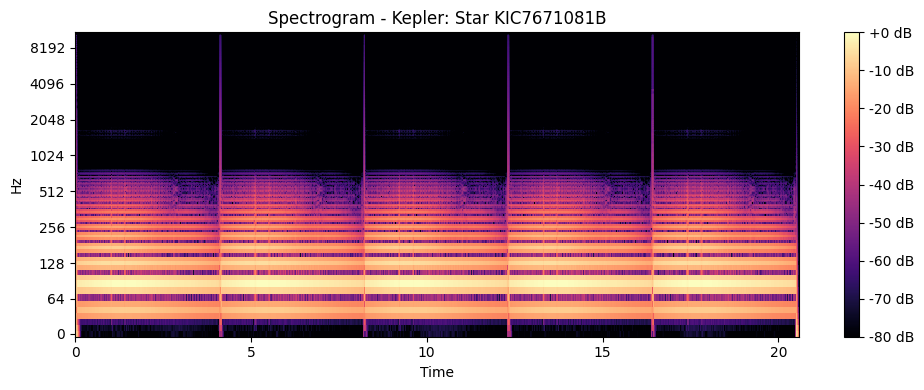

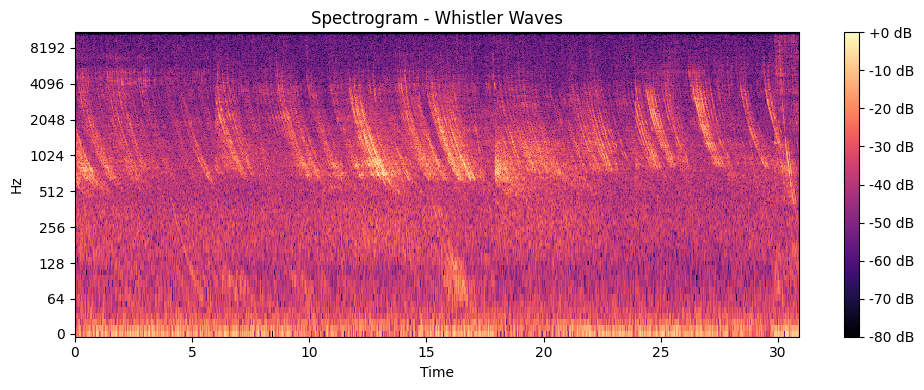

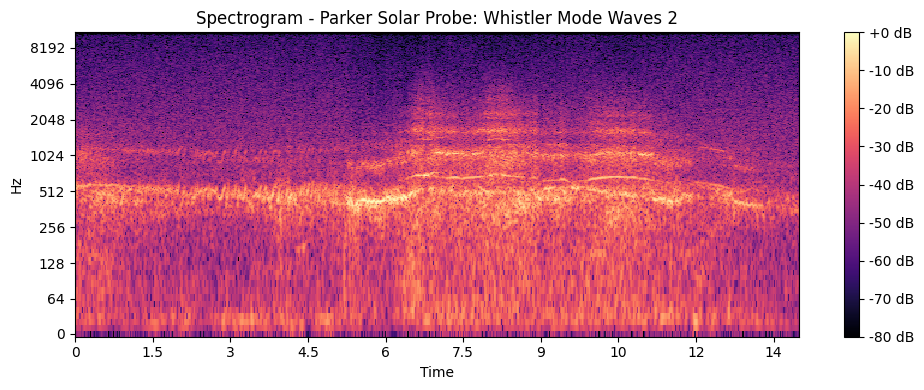

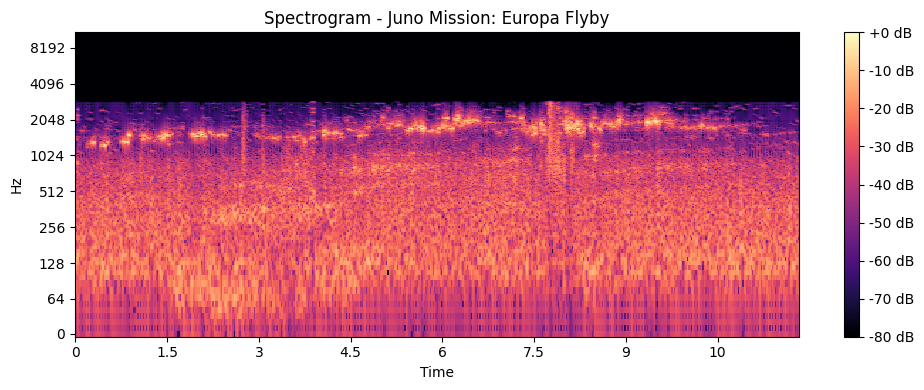

In [12]:
for file_path, title in audio_files.items():
  y, sr = librosa.load(file_path)
  display_spectrogram(y, sr, title)

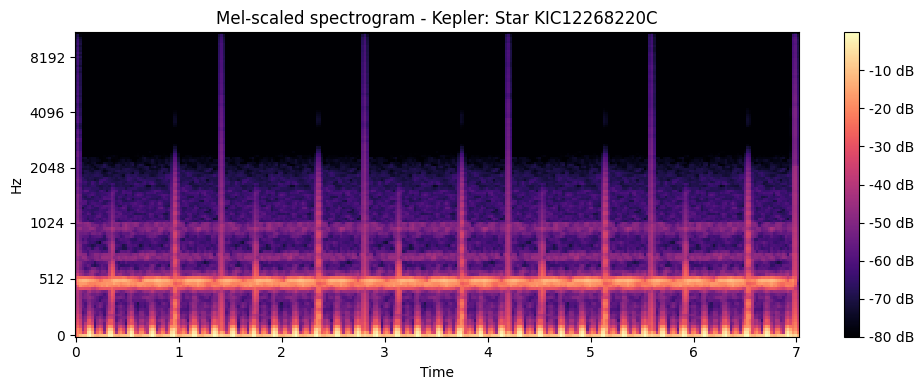

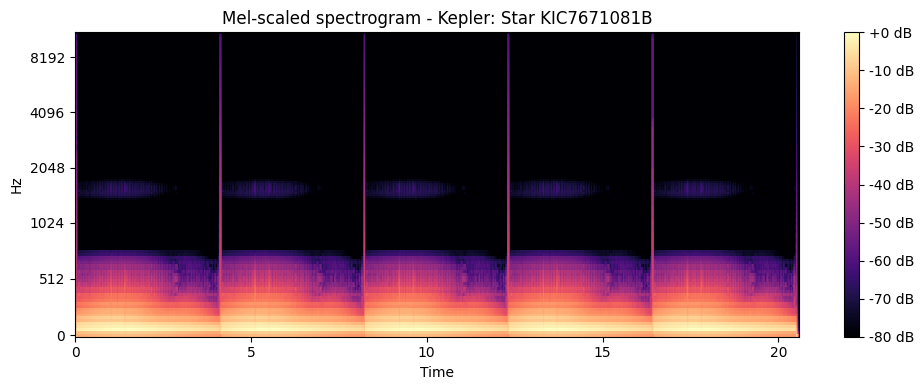

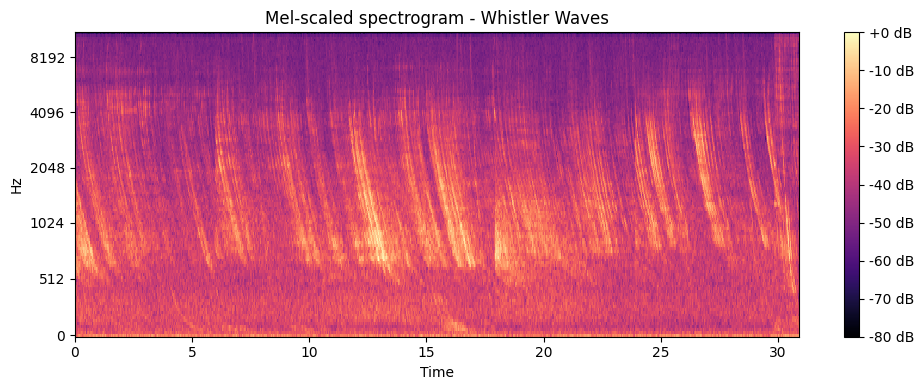

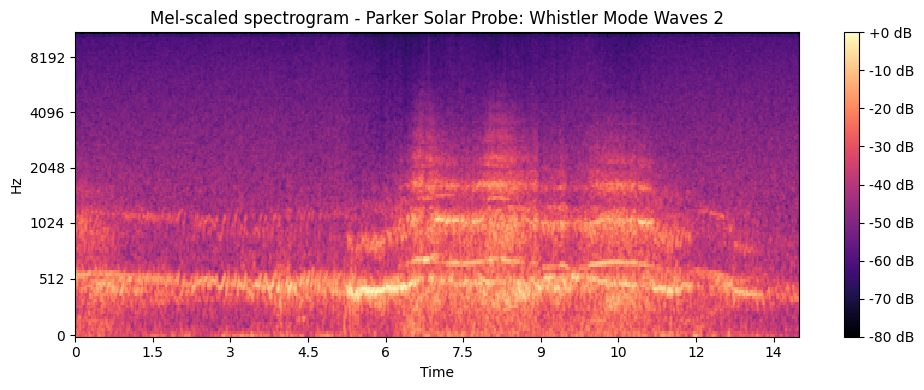

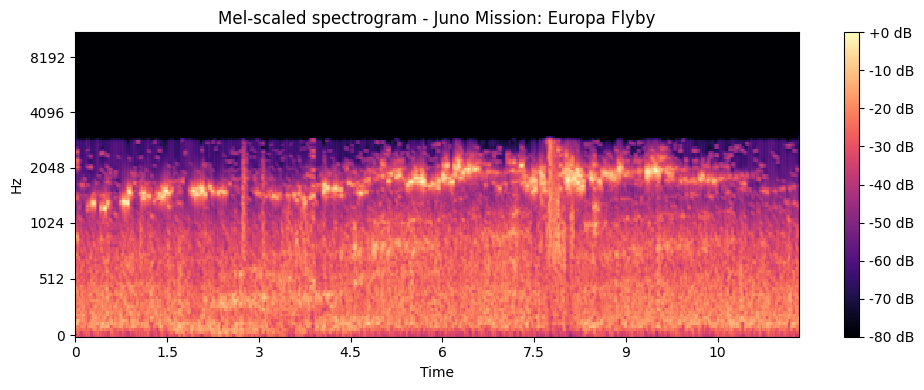

In [13]:
for file_path, title in audio_files.items():
  y, sr = librosa.load(file_path)
  mel_spectrogram(y, sr, title)

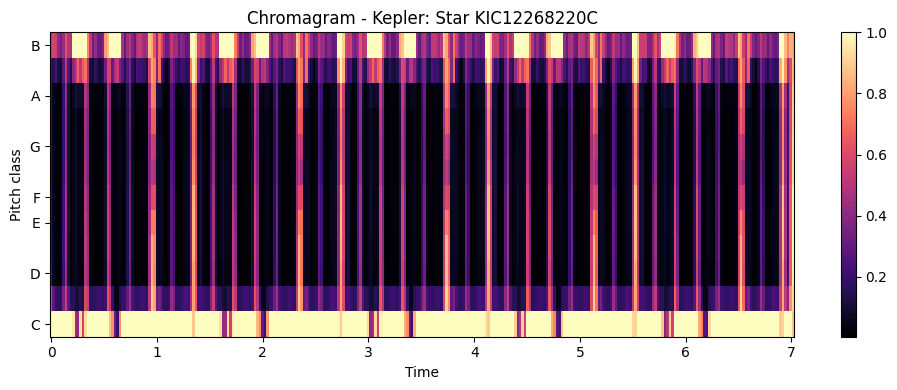

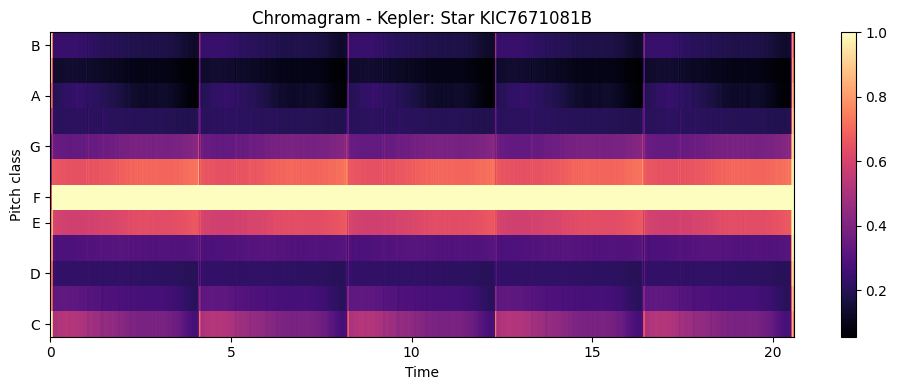

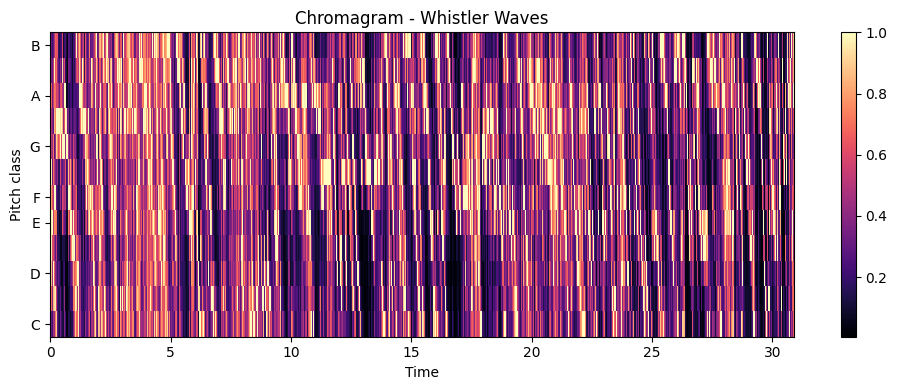

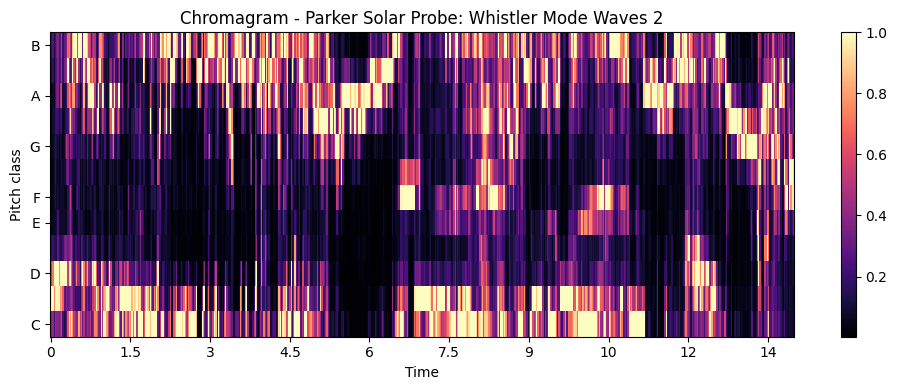

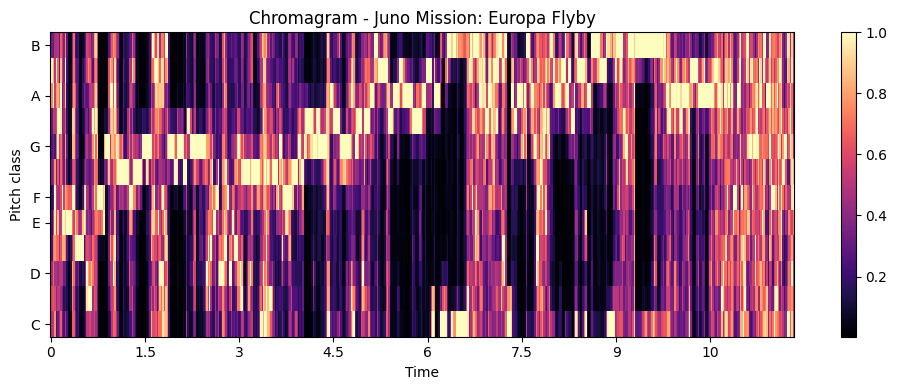

In [14]:
for file_path, title in audio_files.items():
  y, sr = librosa.load(file_path)
  chromagram(y, sr, title)

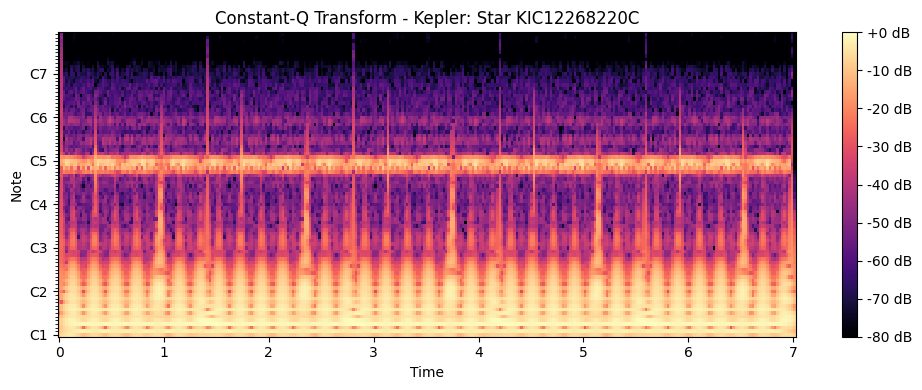

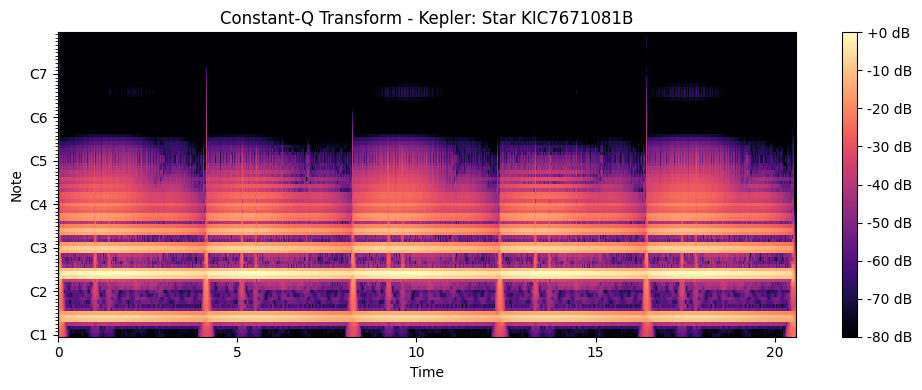

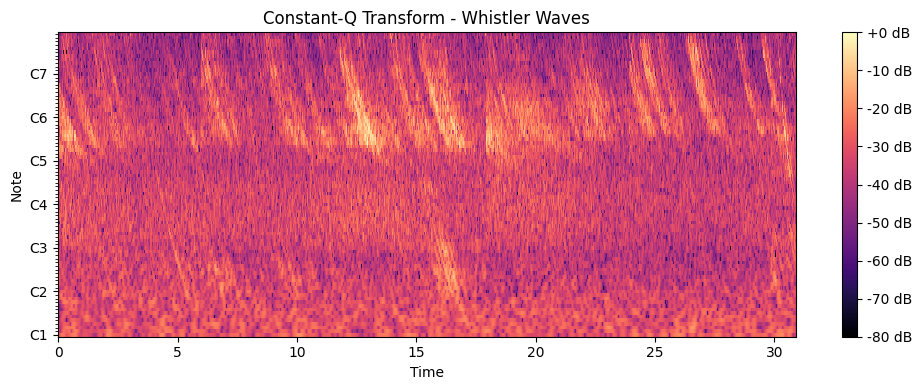

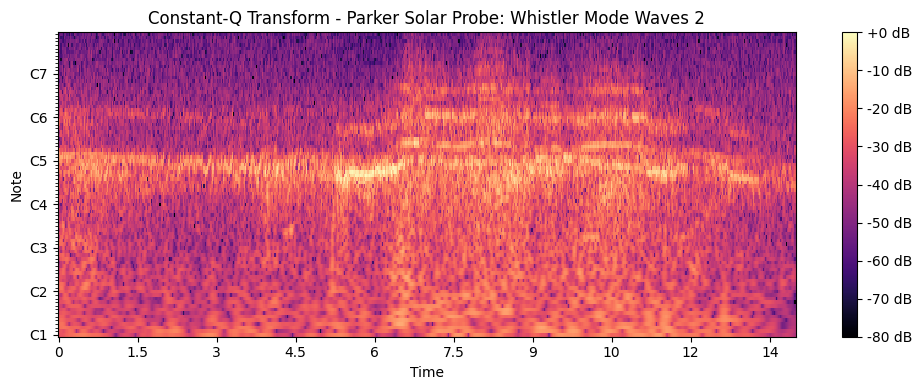

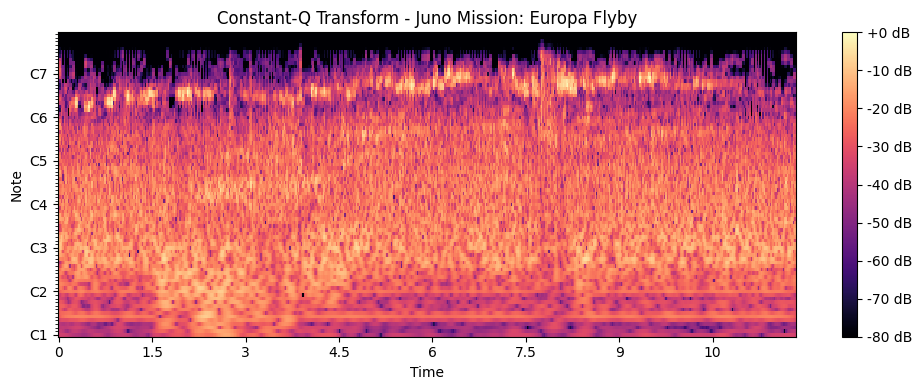

In [15]:
for file_path, title in audio_files.items():
  y, sr = librosa.load(file_path)
  constant_q_transform(y, sr, title)

Kepler: Star KIC12268220C - Tempo: [135.99917763] BPM


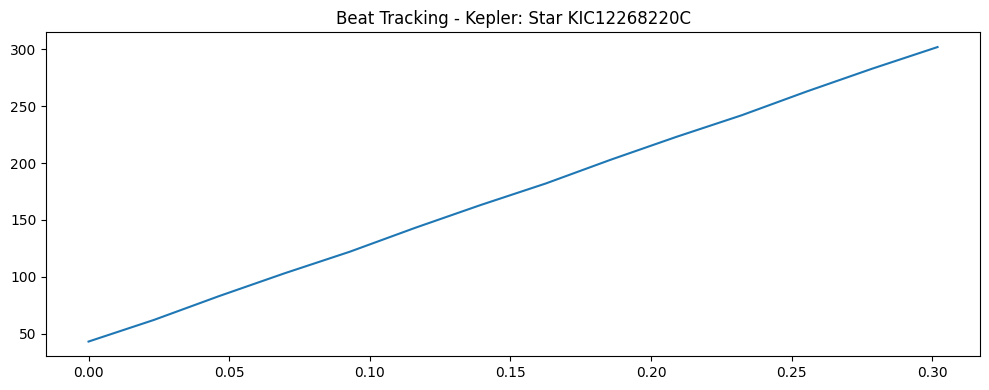

Kepler: Star KIC7671081B - Tempo: [143.5546875] BPM


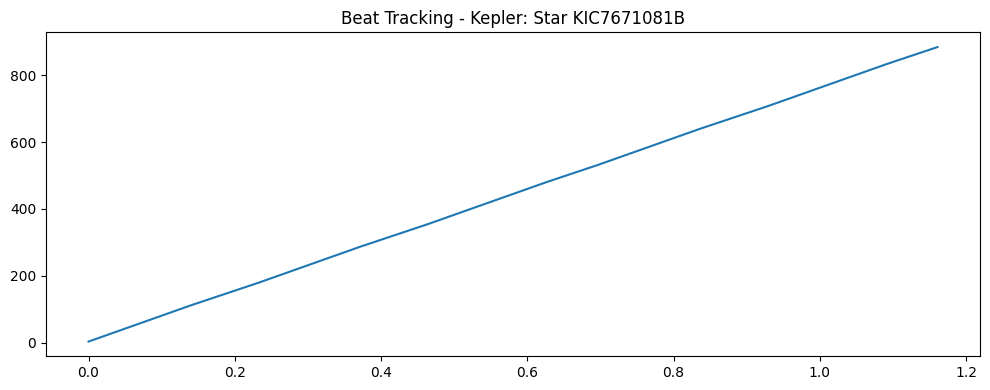

Whistler Waves - Tempo: [143.5546875] BPM


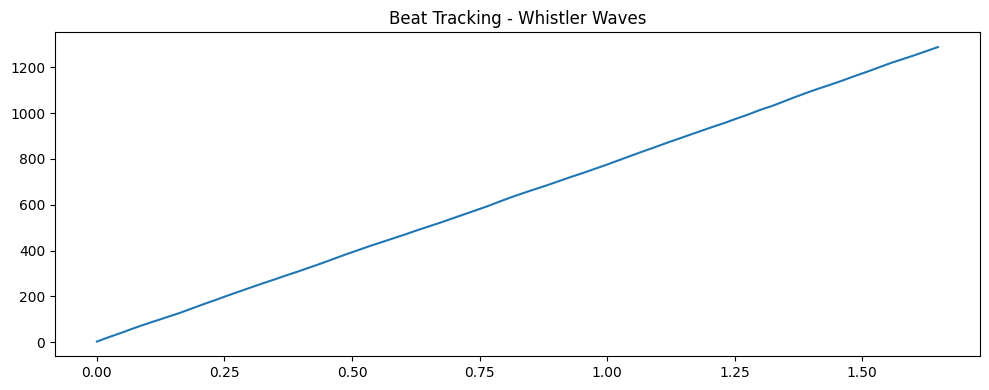

Parker Solar Probe: Whistler Mode Waves 2 - Tempo: [151.99908088] BPM


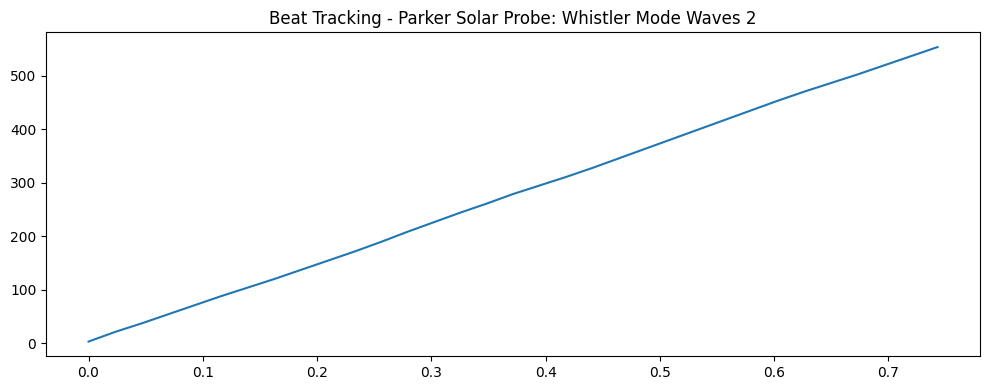

Juno Mission: Europa Flyby - Tempo: [172.265625] BPM


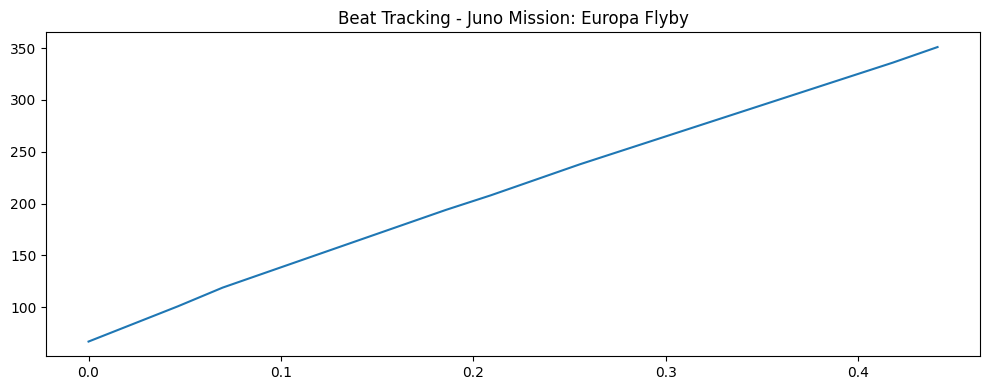

In [16]:
for file_path, title in audio_files.items():
  y, sr = librosa.load(file_path)
  beat_tracking(y, sr, title)

(20, 303)
(20, 887)
(20, 1331)
(20, 603)
(20, 510)


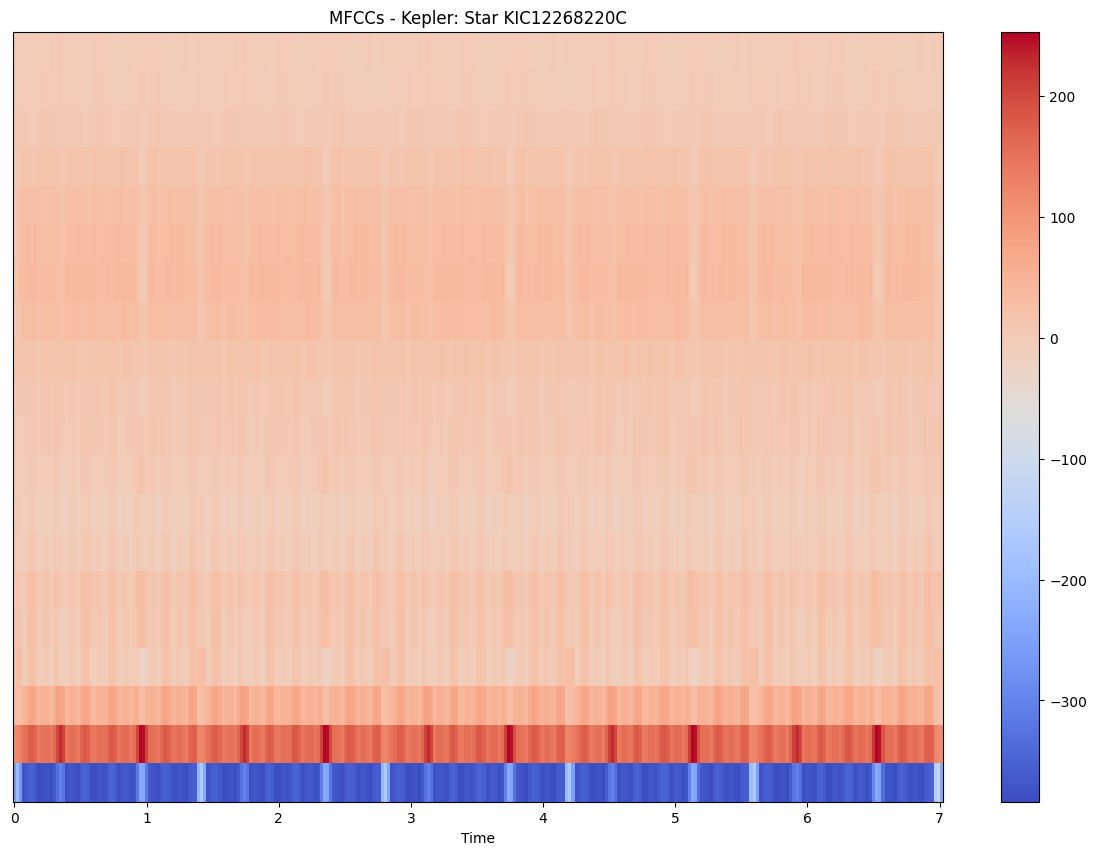

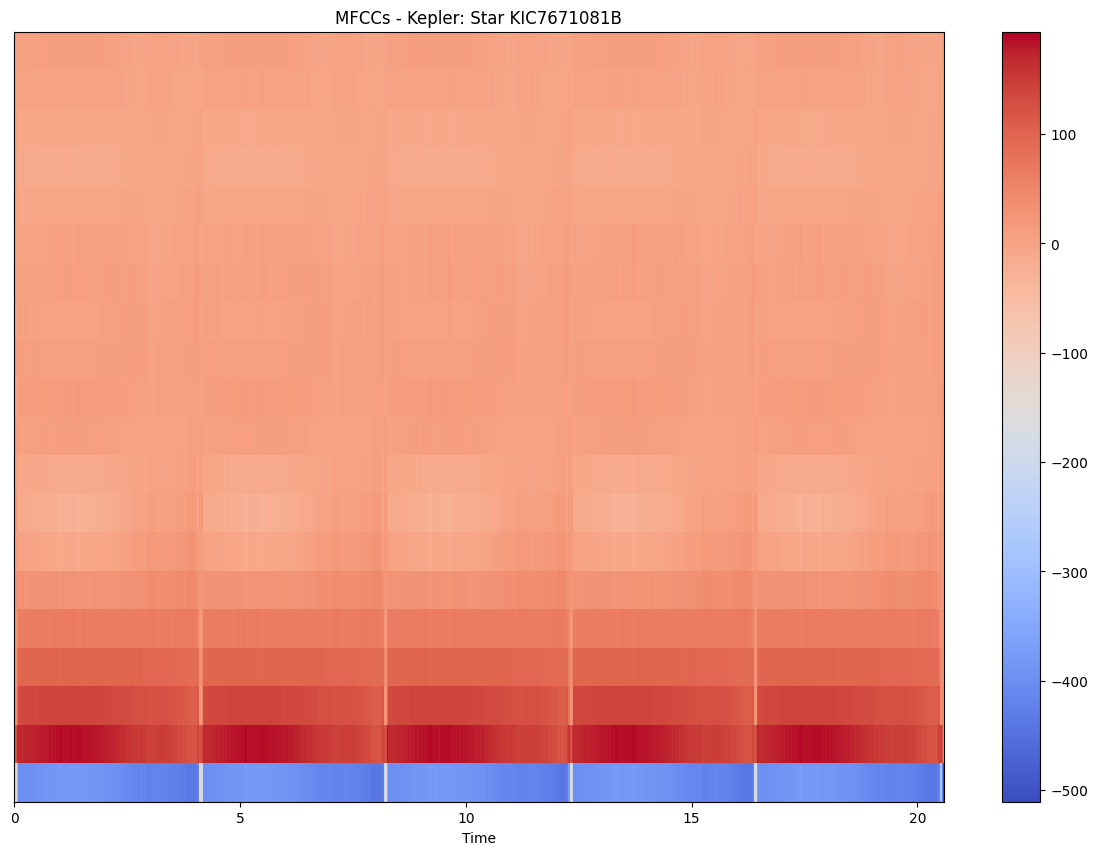

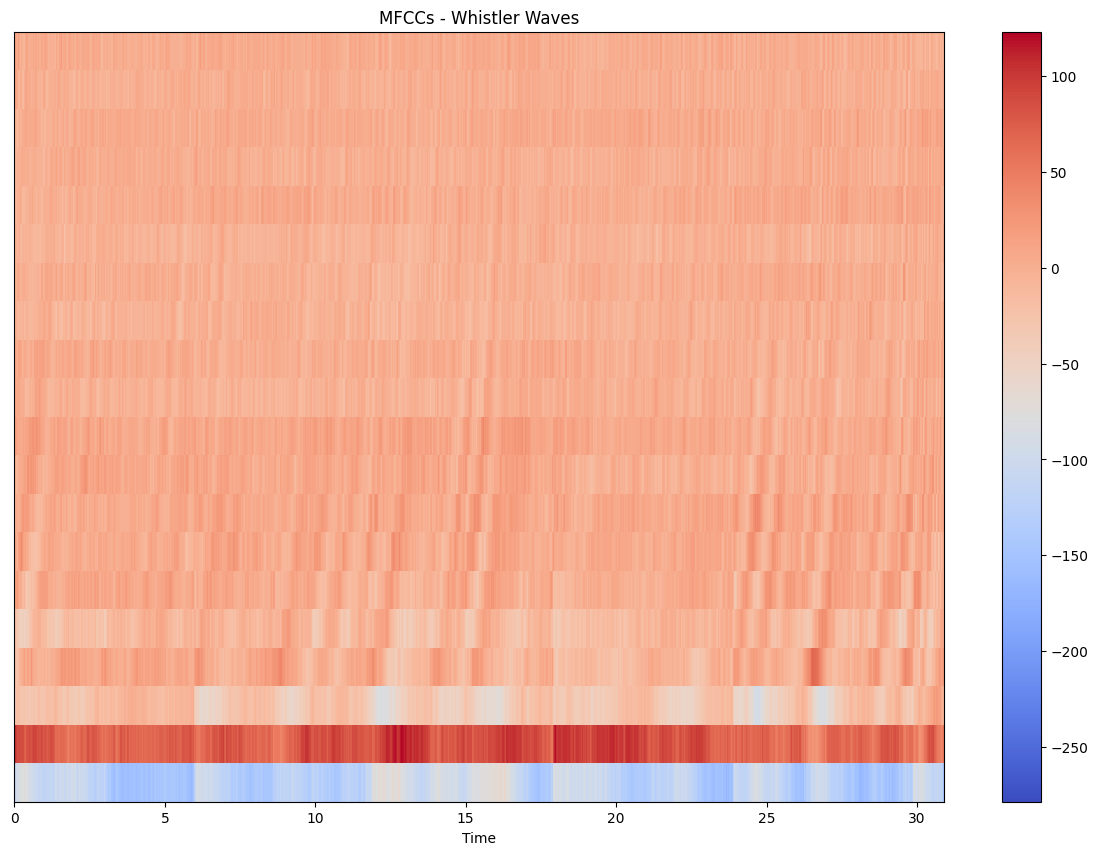

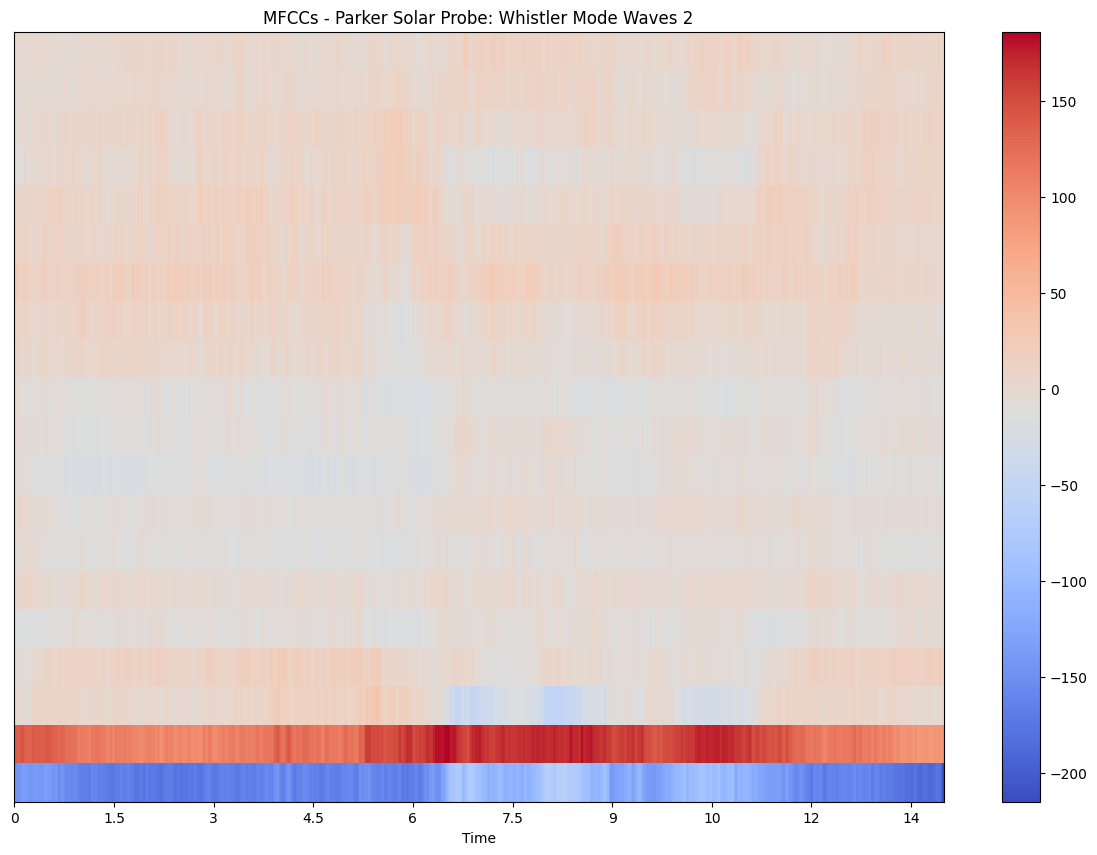

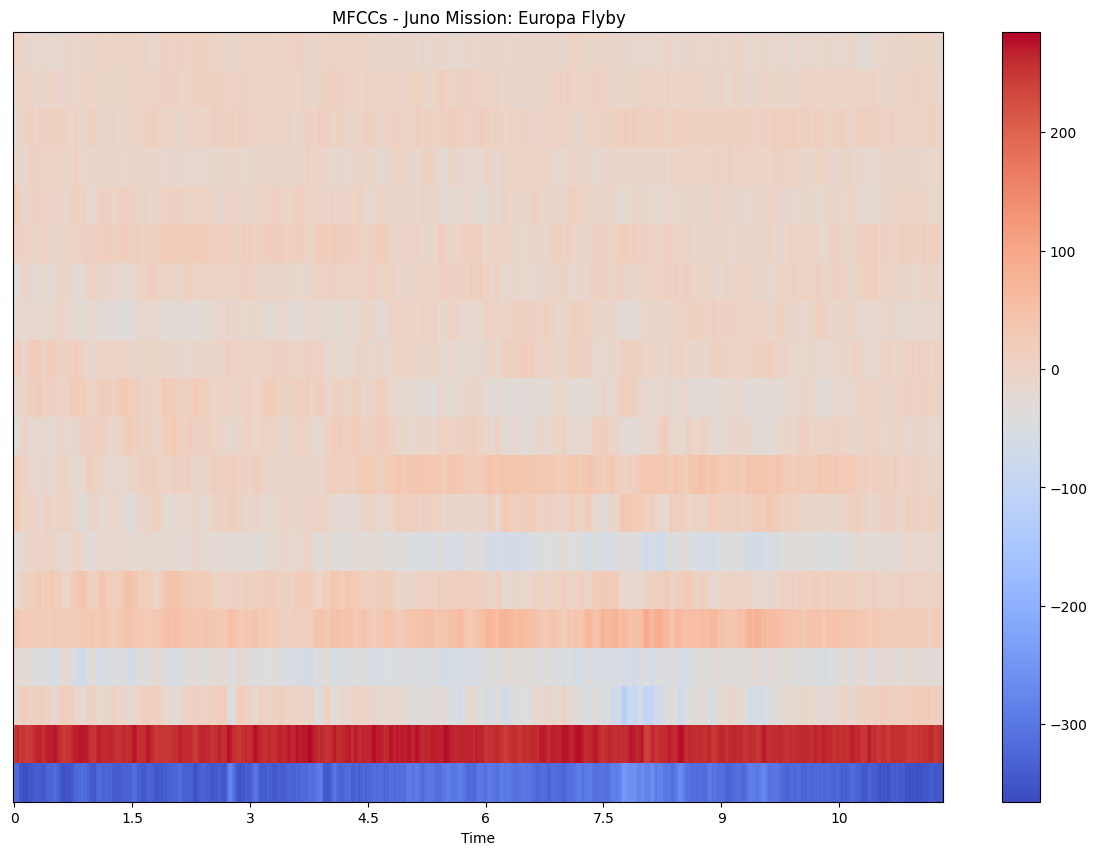

In [24]:
for file_path, title in audio_files.items():
  y, sr = librosa.load(file_path)
  mfccs(y, sr, title)